In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use("./../figures/plotting.mplstyle")
import numpy as np
import h5py

import sys
sys.path.append('./../figures')
from makeCorner import plot_corner

sys.path.append('./../code/')
from utilities import *

Load the sumary file containing output of our autoregressive inference on the $\chi$ and $\cos\theta$ distributions of BBHs:

In [2]:
hdata = h5py.File("./ar_chi_cost_summary.hdf","r")

# List attributes
for key in hdata.attrs.keys():
    print("{0}: {1}".format(key,hdata.attrs[key]))
    
# List groups and datasetes
print("\nGroups:")
print(hdata.keys())

print("\nData sets inside ['posterior']:")
print(hdata['posterior'].keys())

Created_by: process_chi_cost.py
Downloadable_from: 10.5281/zenodo.8087858
Source_code: https://github.com/tcallister/autoregressive-bbh-inference

Groups:
<KeysViewHDF5 ['posterior']>

Data sets inside ['posterior']:
<KeysViewHDF5 ['R_ref', 'alpha', 'ar_chi_std', 'ar_chi_tau', 'ar_cost_std', 'ar_cost_tau', 'bq', 'chis', 'costs', 'dR_dchis', 'dR_dcosts', 'f_chis', 'f_costs', 'kappa', 'log_dmMax', 'log_dmMin', 'log_f_peak', 'mMax', 'mMin', 'min_log_neff', 'mu_m1', 'nEff_inj_per_event', 'sig_m1']>


The different `hdata['posterior/']` datasets correspond to the following:

| Name      | Description |
| :---------- | :---------- |
| `R_ref`     | The mean on our AR1 processes over $\chi$ and $\cos\theta$ at $m_1=20\,M_\odot$ and $z=0.2$  |
| `ar_chi_std` | The square of this is the prior variance of our AR process over $\chi$ per autocorrelation length |
| `ar_chi_tau` | The autocorrelation length of our AR process over $\chi$ |
| `ar_cost_std` | The square of this is the prior variance of our AR process over $\cos\theta$ per autocorrelation length |
| `ar_cost_tau` | The autocorrelation length of our AR process over $\cos\theta$ |
| `dR_dchis` | The source-frame volumetric merger $\frac{d\mathcal{R}}{d\ln m_1\,dq\,da_1\,da_2\,d\cos\theta_1\,d\cos\theta_2}$ as a function of spin magnitude, evaluated at $m_1=20\,M_\odot$, $q=1$, $z=0.2$, $\cos\theta_1=\cos\theta_2 = 1$, and $a_1=a_2$, with units $\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}$ |
| `dR_dcosts` | The source-frame volumetric merger $\frac{d\mathcal{R}}{d\ln m_1\,dq\,da_1\,da_2\,d\cos\theta_1\,d\cos\theta_2}$ as a function of cosine spin tilt, evaluated at $m_1=20\,M_\odot$, $q=1$, $z=0.2$, $a_1=a_2 = 0.1$, and $\cos\theta_1=\cos\theta_2$, with units $\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}$ |
| `f_chis` | The logarithm of this quantity is our AR1 process over spin magnitude; the square of this quantity is proportional to `dR_dchis` |
| `f_costs` | The logarithm of this quantity is our AR1 process over cosine spin tilt; the square of this quantity is proportional to `dR_dcosts` |
| `chis` | Set of spin magnitudes over which `dR_dchis` and `f_chis` are defined |
| `costs` | Set of cosine spin tilts over which `dR_dcosts` and `f_costs` are defined |
| `alpha` | Power-law index of the "power law" part our primary mass model |
| `mu_m1` | Mean of the Gaussian peak in our primary mass model |
| `sig_m1` | Standard deviation of the Gaussian peak in our primary mass model |
| `log_f_peak` | Log10 of the fraction of BBHs comprising the Gaussian peak, rather than the power law |
| `mMin` | Mass below which the primary mass distribution goes to zero |
| `mMax` | Mass above which the primary mass distribution goes to zero |
| `log_dmMin` | Log10 of the scale length over which the primary mass distribution is smoothly sent to zero below `mMin` |
| `log_dmMax` | Log10 of the scale length over which the primary mass distribution is smoothly sent to zero above `mMax` |
| `bq` | Power-law index governing the mass ratio distribution |
| `kappa` | This is the power-law index governing growth of the merger rate, assumed to evolve as $(1+z)^\kappa$ |
| `nEff_inj_per_event` | Number of effective injections per event informing our Monte Carlo estimate of detection efficiency |
| `min_log_neff` | For each posterior sample, minimum (log10) number of effective posterior samples informing our Monte Carlo estimates of each event's likelihood, taken over all events |

Make corner plots of all these quantities.
There are a lot of parameters, so split them across a few corner plots.
First, parameters describing the spin AR processes:

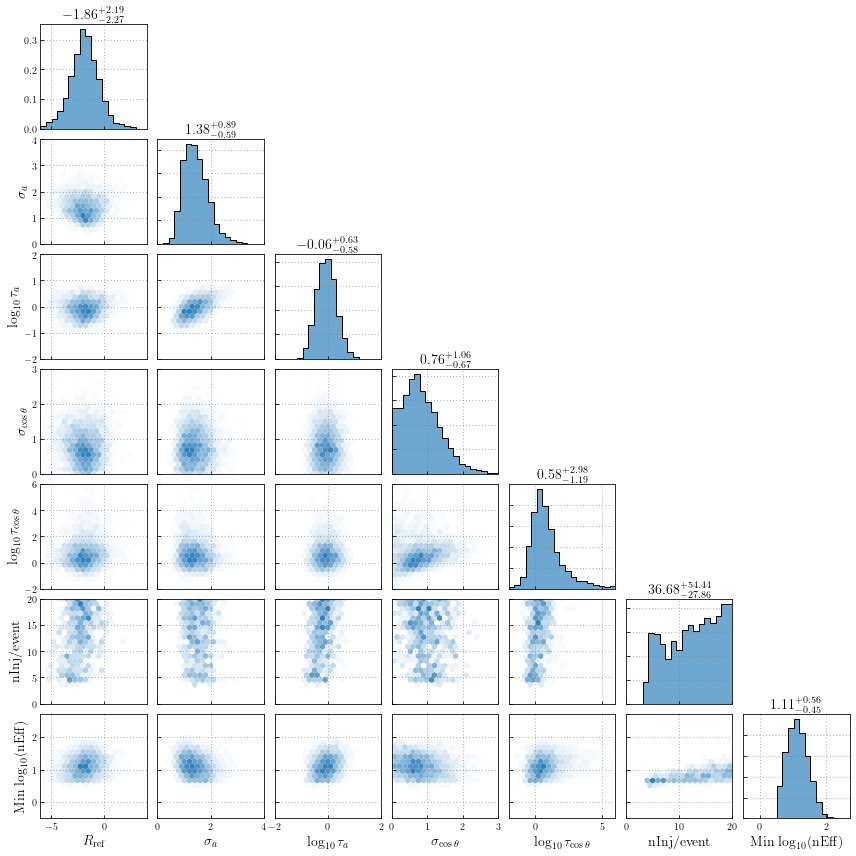

In [3]:
plot_data = {
    'R_ref':{'data':np.log10(hdata['posterior/R_ref'][()]),'plot_bounds':(-6,4),'label':r'$R_\mathrm{ref}$'},
    'chi_std':{'data':hdata['posterior/ar_chi_std'][()],'plot_bounds':(0,4),'label':r'$\sigma_{a}$'},
    'chi_tau':{'data':np.log10(hdata['posterior/ar_chi_tau'][()]),'plot_bounds':(-2,2),'label':r'$\log_{10}\tau_{a}$'},
    'cost_std':{'data':hdata['posterior/ar_cost_std'][()],'plot_bounds':(0,3),'label':r'$\sigma_{\cos\theta}$'},
    'cost_tau':{'data':np.log10(hdata['posterior/ar_cost_tau'][()]),'plot_bounds':(-2,6),'label':r'$\log_{10}\tau_{\cos\theta}$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,20),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(12,12))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

Next, parameters governing the mass, mass ratio, and redshift distributions:

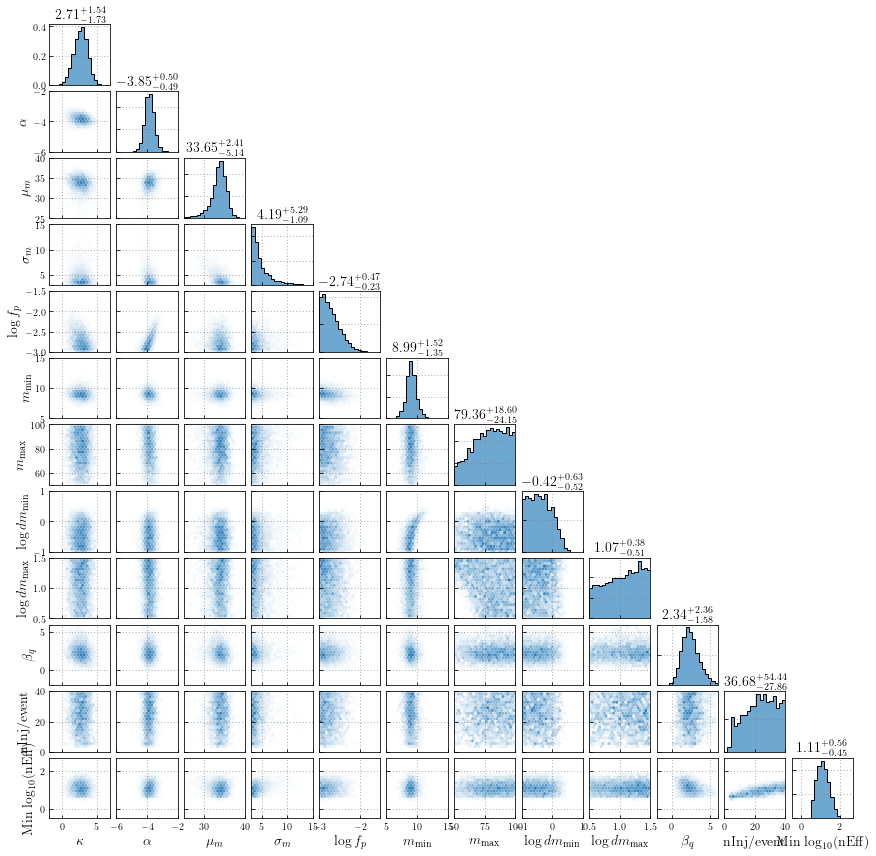

In [4]:
plot_data = {
    'kappa':{'data':hdata['posterior/kappa'][()],'plot_bounds':(-2,7),'label':r'$\kappa$'},
    'alpha':{'data':hdata['posterior/alpha'][()],'plot_bounds':(-6,-2),'label':r'$\alpha$'},
    'mu_m1':{'data':hdata['posterior/mu_m1'][()],'plot_bounds':(25,40),'label':r'$\mu_m$'},
    'sig_m1':{'data':hdata['posterior/sig_m1'][()],'plot_bounds':(3,15),'label':r'$\sigma_m$'},
    'log_f_peak':{'data':hdata['posterior/log_f_peak'][()],'plot_bounds':(-3,-1.5),'label':r'$\log f_p$'},
    'mMin':{'data':hdata['posterior/mMin'][()],'plot_bounds':(5,15),'label':r'$m_\mathrm{min}$'},
    'mMax':{'data':hdata['posterior/mMax'][()],'plot_bounds':(50,100),'label':r'$m_\mathrm{max}$'},
    'log_dmMin':{'data':hdata['posterior/log_dmMin'][()],'plot_bounds':(-1,1),'label':r'$\log dm_\mathrm{min}$'},
    'log_dmMax':{'data':hdata['posterior/log_dmMax'][()],'plot_bounds':(0.5,1.5),'label':r'$\log dm_\mathrm{max}$'},
    'bq':{'data':hdata['posterior/bq'][()],'plot_bounds':(-2,6),'label':r'$\beta_q$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(12,12))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

Let's plot the actual measured distributions of BBH parameters:

### 1. Primary mass

We can show this a few different ways.
First, the below plot shows the source-frame merger rate density $\frac{d\mathcal{R}}{d\ln m_1\,dq\,da_1\,da_2\,d\cos\theta_1\,d\cos\theta_2}$ as a function of $m_1$, evaluated at $q=1$, $z=0.2$, $a_1=a_2=0.1$, and $\cos\theta_1=\cos\theta_2=1$.

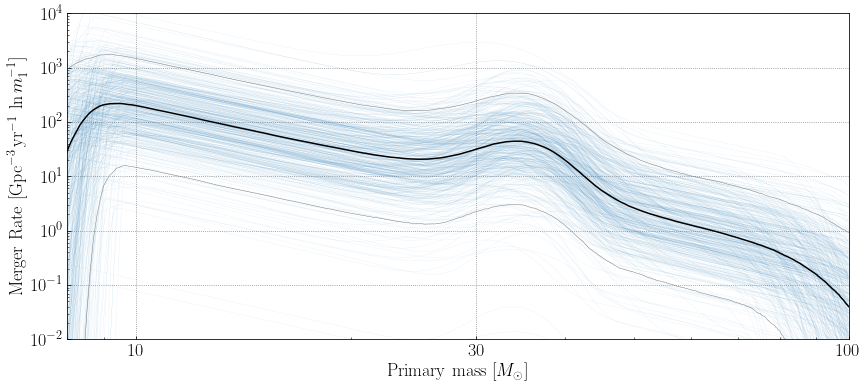

In [5]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]
f_chis = hdata['posterior/f_chis'][()]
f_costs = hdata['posterior/f_costs'][()]
chis = hdata['posterior/chis'][()]
costs = hdata['posterior/costs'][()]

# Get value of AR processes near chi=0.1 and cost=1
f_chi_01 = f_chis[np.argmin(np.abs(chis-0.1))]
f_cost_1 = f_costs[-1,:]

# Grid over which to evaluate masses
mass_grid = np.linspace(5,100,1000)
dR_dlnm1 = np.zeros((R_ref.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    # Note that we need to normalize to m1=20, according to our definition of R_ref
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability density at q=1
    p_q_1 = (1.+bq[i])/(1.-(tmp_min/mass_grid)**(1.+bq[i]))
    
    # Combine
    # Note that, through the definition of R_ref, this is already defined at z=0.2
    # Also note that we need the *squares* of f_chi and f_cost, one per component spin
    dR_dlnm1[i,:] = R_ref[i]*f_m1*p_q_1*f_chi_01[i]**2*f_cost_1[i]**2*mass_grid

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),500):
    ax.plot(mass_grid,dR_dlnm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(dR_dlnm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(dR_dlnm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(dR_dlnm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-2,1e4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()

We could alternatively show the rate $\frac{d\mathcal{R}}{d\ln m_1\,dq}$ as a function of $m_1$, again evaluated at $q=1$ and $z=0.2$ but now having integrated over spin degrees of freedom; this is most directly comparable to e.g. Fig. 3 of the paper text.

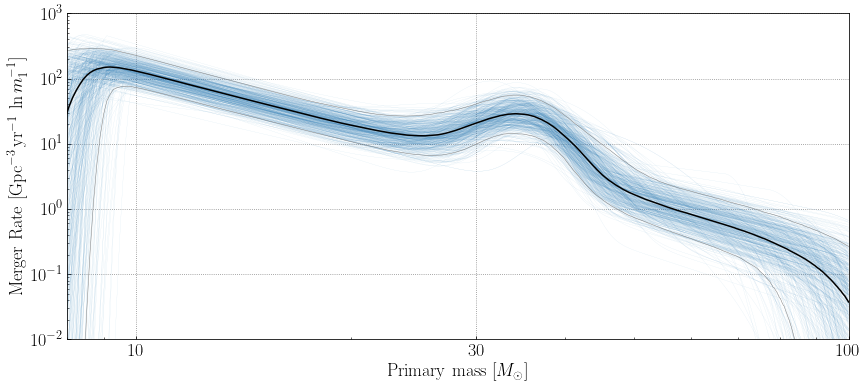

In [6]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]
f_chis = hdata['posterior/f_chis'][()]
f_costs = hdata['posterior/f_costs'][()]
chis = hdata['posterior/chis'][()]
costs = hdata['posterior/costs'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(5,100,1000)
dR_dlnm1 = np.zeros((R_ref.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    # Note that we need to normalize to m1=20, according to our definition of R_ref
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # This time, integrate out over the spin magnitude and tilt dimensions
    f_chi_integral = np.trapz(f_chis[:,i],chis,axis=0)
    f_cost_integral = np.trapz(f_costs[:,i],costs,axis=0)
    
    # Probability density at q=1
    p_q_1 = (1.+bq[i])/(1.-(tmp_min/mass_grid)**(1.+bq[i]))
    
    # Combine
    # Note that, through the definition of R_ref, this is already defined at z=0.2
    # As above, we need the *squared* integrals over chi and cost
    dR_dlnm1[i,:] = R_ref[i]*f_m1*p_q_1*f_chi_integral**2*f_cost_integral**2*mass_grid

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),500):
    ax.plot(mass_grid,dR_dlnm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(dR_dlnm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(dR_dlnm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(dR_dlnm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-2,1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()

Lastly, we could instead plot the normalized probability distribution over $\ln m_1$ (**caution**: note that many papers instead show probability distributions over $m_1$, which will be steeper than that shown here)

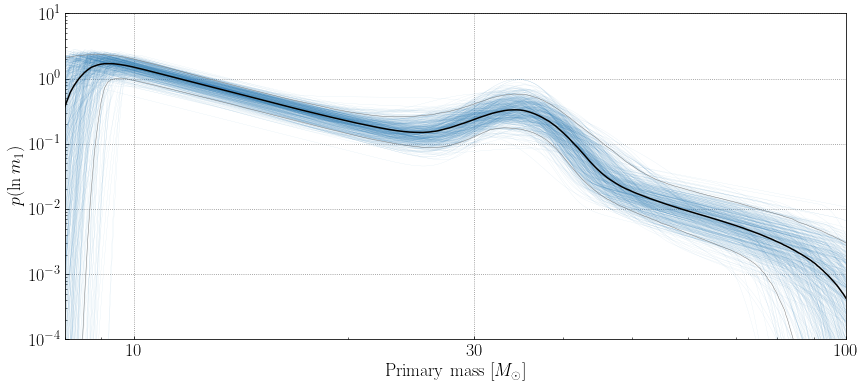

In [7]:
# Extract things from the hdf file
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(5,100,1000)
p_lnm1 = np.zeros((alpha.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    p_m1_unnormed = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    
    # Normalize and multiply by m1 to obtain p_lnm1
    p_lnm1[i,:] = p_m1_unnormed/np.trapz(p_m1_unnormed,mass_grid)*mass_grid

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),500):
    ax.plot(mass_grid,p_lnm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(p_lnm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(p_lnm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(p_lnm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-4,10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('$p(\ln m_1)$',fontsize=18)

plt.show()

### 2. Mass ratio

The below plot shows the source-frame merger rate density $\frac{d\mathcal{R}}{d\ln m_1 dq}$ evaluated at $m_1=20\,M_\odot$ and $z=0.2$ and marginalized over spins.

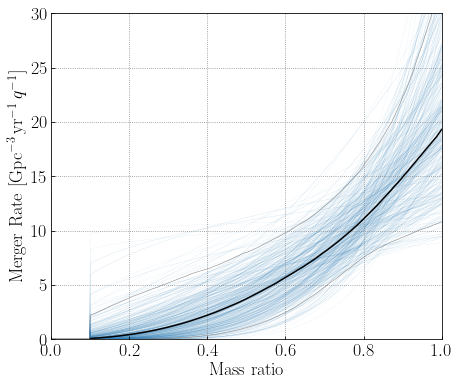

In [8]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
bq = hdata['posterior/bq'][()]
f_chis = hdata['posterior/f_chis'][()]
f_costs = hdata['posterior/f_costs'][()]
chis = hdata['posterior/chis'][()]
costs = hdata['posterior/costs'][()]

# Define grid over which to evaluate R(q)
q_grid = np.linspace(1e-3,1,1000)
dR_dqs = np.zeros((R_ref.size,q_grid.size))

for i in range(R_ref.size):
    
    # Probability density over mass ratios at m1=20
    m1_ref = 20.
    p_qs = (1.+bq[i])*q_grid**bq[i]/(1.-(tmp_min/m1_ref)**(1.+bq[i]))
    
    # Truncate below minimum mass ratio
    p_qs[q_grid<tmp_min/m1_ref] = 0
    
    # Integrate over component spins
    f_chi_integral = np.trapz(f_chis[:,i],chis,axis=0)
    f_cost_integral = np.trapz(f_costs[:,i],costs,axis=0)
    
    # Construct full rate
    # Note that, by definition, R_ref already corresponds to the rate at m1=20 Msun and z=0.2
    # We still, however, need to multiply by m1 to convert from a rate per mass to a rate per *log* mass
    dR_dqs[i,:] = R_ref[i]*p_qs*f_chi_integral**2*f_cost_integral**2*m1_ref

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(dR_dqs.shape[1]),500):
    ax.plot(q_grid,dR_dqs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(q_grid,np.median(dR_dqs,axis=0),color='black')
ax.plot(q_grid,np.quantile(dR_dqs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(q_grid,np.quantile(dR_dqs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1)
ax.set_ylim(0,30)
ax.set_xlabel('Mass ratio',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

Alternatively, we might integrate over $\ln m_1$ to obtain the merger rate $\frac{d\mathcal{R}}{dq}$ evaluated at $z=0.2$ (and still marginalized over spins).

**Another caution**: when integrating over $m_1$, the remaining overall structure of $R(q)$ is entirely dominated by our assumptions concerning minimum masses and truncations on the $p(q)$ distribution. The very slight jaggedness that can be seen at low $q$ below, for instance, corresponds to locations where $q$ falls below our minimum allowed mass ratio ($2\,M_\odot/m_1$) for different values of $m_1$, and hence $R(q,m_1)$ at these locations is sent to zero. The net effect is to produce an overall $R(q)$ that is sharply decreasing towards smaller $q$, but this is entirely due to our choice to truncate $q$ below some minimum value. Our truncation model here differs slightly from that in e.g. Abbott+ 2023, and so our plot will correspondingly look a bit different from e.g. Fig. 10 in Abbott+.

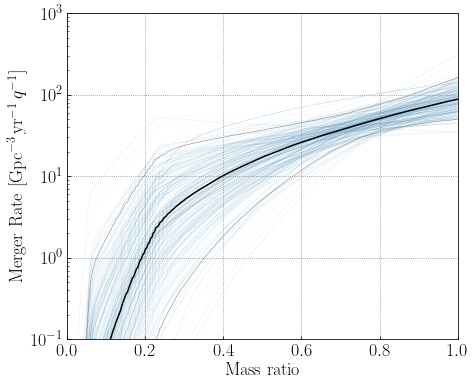

In [9]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]
f_chis = hdata['posterior/f_chis'][()]
f_costs = hdata['posterior/f_costs'][()]
chis = hdata['posterior/chis'][()]
costs = hdata['posterior/costs'][()]

# This time we'll need a 2D grid over primary masses and spins
mass_grid = np.linspace(5.,100.,300)
q_grid = np.linspace(1e-3,1,301)
Ms,Qs = np.meshgrid(mass_grid,q_grid)

dR_dqs = np.zeros((R_ref.size,q_grid.size))

for i in range(R_ref.size):
    
    # Variation in the merger rate over primary masses
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(Ms,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability densities over mass ratios, conditioned on each primary mass
    p_qs = (1.+bq[i])*Qs**bq[i]/(1.-(tmp_min/Ms)**(1.+bq[i]))
    p_qs[Qs<tmp_min/Ms] = 0
    
    # Integrate over component spins
    f_chi_integral = np.trapz(f_chis[:,i],chis,axis=0)
    f_cost_integral = np.trapz(f_costs[:,i],costs,axis=0)
    
    # Construct full rate over the 2D mass vs. q space
    # Note that, by definition, R_ref already corresponds to the rate at m1=20 Msun and z=0.2
    dR_dm1s_dqs = R_ref[i]*f_m1*p_qs*f_chi_integral**2*f_cost_integral**2
    
    # Finally, integrate out masses
    dR_dqs[i,:] = np.trapz(dR_dm1s_dqs,mass_grid,axis=1)

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(dR_dqs.shape[1]),500):
    ax.plot(q_grid,dR_dqs[i,:],color='#3182bd',alpha=0.15,lw=0.15,zorder=0)

ax.plot(q_grid,np.median(dR_dqs,axis=0),color='black')
ax.plot(q_grid,np.quantile(dR_dqs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(q_grid,np.quantile(dR_dqs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1)
ax.set_ylim(1e-1,1e3)
ax.set_yscale('log')
ax.set_xlabel('Mass ratio',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

### 3. Component spin magnitudes

First, plot the merger rate $\frac{d\mathcal{R}}{d\ln m_1\,dq\,da_1\,da_2\,d\cos\theta_1\,d\cos\theta_2}$ across the $a_1 = a_2$ line, at fixed $m_1=20\,M_\odot$, $q=1$, $z=0.2$, and $\cos\theta_1=\cos\theta_2=1$.

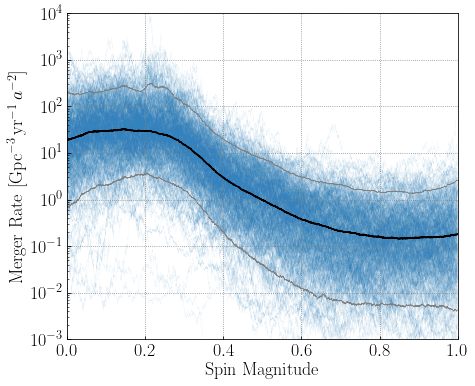

In [10]:
# Extract things from the hdf file
dR_dchis = hdata['posterior/dR_dchis'][()]
chis = hdata['posterior/chis'][()]

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(dR_dchis.shape[1]),500):
    ax.plot(chis,dR_dchis[:,i],color='#3182bd',alpha=0.15,lw=0.15,zorder=0)

ax.plot(chis,np.median(dR_dchis,axis=1),color='black')
ax.plot(chis,np.quantile(dR_dchis,0.05,axis=1),color='grey',lw=0.5)
ax.plot(chis,np.quantile(dR_dchis,0.95,axis=1),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1)
ax.set_ylim(1e-3,1e4)
ax.set_yscale('log')
ax.set_xlabel('Spin Magnitude',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,a^{-2}$]',fontsize=18)

plt.show()

Alternatively, plot our results as normalized probability distributions over *individual* component spin magnitudes. This is proportional to the square root of the curves shown above.

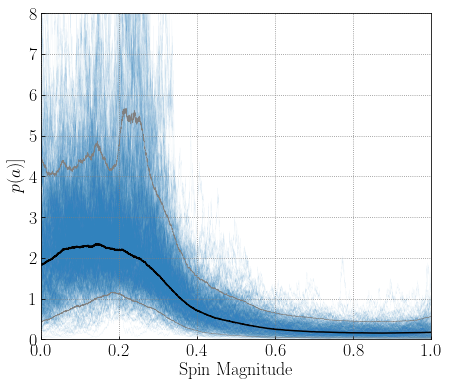

In [11]:
# Extract things from the hdf file
f_chis = hdata['posterior/f_chis'][()]
chis = hdata['posterior/chis'][()]

# Construct normalized probability distributions
p_chis = np.zeros(f_chis.shape)
for i in range(f_chis.shape[1]):
    p_chis[:,i] = f_chis[:,i]/np.trapz(f_chis[:,i],chis)

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(p_chis.shape[1]),500):
    ax.plot(chis,p_chis[:,i],color='#3182bd',alpha=0.15,lw=0.15,zorder=0)

ax.plot(chis,np.median(p_chis,axis=1),color='black')
ax.plot(chis,np.quantile(p_chis,0.05,axis=1),color='grey',lw=0.5)
ax.plot(chis,np.quantile(p_chis,0.95,axis=1),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1)
ax.set_ylim(0,8)
ax.set_xlabel('Spin Magnitude',fontsize=18)
ax.set_ylabel('$p(a)$]',fontsize=18)

plt.show()

### 4. Component spin tilts

First, plot the merger rate $\frac{d\mathcal{R}}{d\ln m_1\,dq\,da_1\,da_2\,d\cos\theta_1\,d\cos\theta_2}$ across the $\cos\theta_1 = \cos\theta_2$ line, at fixed $m_1=20\,M_\odot$, $q=1$, $z=0.2$, and $a_1=a_2=0.1$.

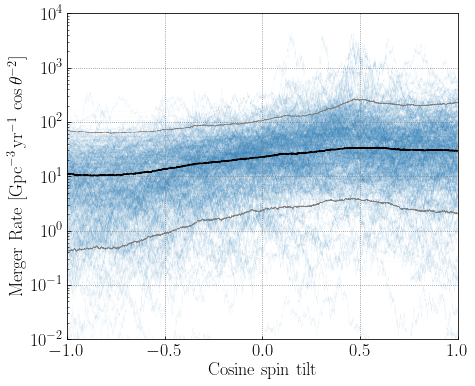

In [12]:
# Extract things from the hdf file
dR_dcosts = hdata['posterior/dR_dcosts'][()]
costs = hdata['posterior/costs'][()]

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(dR_dcosts.shape[1]),500):
    ax.plot(costs,dR_dcosts[:,i],color='#3182bd',alpha=0.15,lw=0.15,zorder=0)

ax.plot(costs,np.median(dR_dcosts,axis=1),color='black')
ax.plot(costs,np.quantile(dR_dcosts,0.05,axis=1),color='grey',lw=0.5)
ax.plot(costs,np.quantile(dR_dcosts,0.95,axis=1),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(-1,1)
ax.set_ylim(1e-2,1e4)
ax.set_yscale('log')
ax.set_xlabel('Cosine spin tilt',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\cos\\theta^{-2}$]',fontsize=18)

plt.show()

Alternatively, plot our results as normalized probability distributions over *individual* component spin tilts. This is proportional to the square root of the curves shown above.

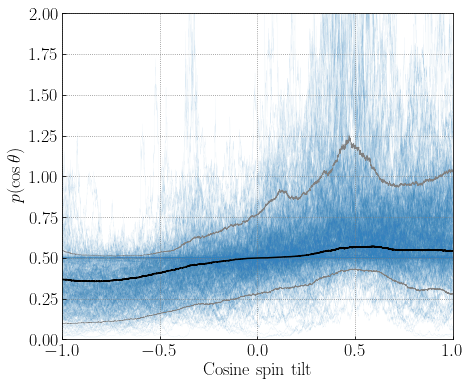

In [13]:
# Extract things from the hdf file
f_costs = hdata['posterior/f_costs'][()]
costs = hdata['posterior/costs'][()]

# Construct normalized probability distributions
p_costs = np.zeros(f_costs.shape)
for i in range(f_costs.shape[1]):
    p_costs[:,i] = f_costs[:,i]/np.trapz(f_costs[:,i],costs)

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(p_costs.shape[1]),500):
    ax.plot(costs,p_costs[:,i],color='#3182bd',alpha=0.15,lw=0.15,zorder=0)

ax.plot(costs,np.median(p_costs,axis=1),color='black')
ax.plot(costs,np.quantile(p_costs,0.05,axis=1),color='grey',lw=0.5)
ax.plot(costs,np.quantile(p_costs,0.95,axis=1),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(-1,1)
ax.set_ylim(0,2)
ax.set_xlabel('Cosine spin tilt',fontsize=18)
ax.set_ylabel('$p(\cos\\theta)$',fontsize=18)

plt.show()

### 5. Redshifts

Plot the evolution of the merger rate $\frac{d\mathcal{R}}{d\ln m_1 dq}$ across redshift, evaluated at fixed $m_1 = 20\,M_\odot$ and $q=1$.

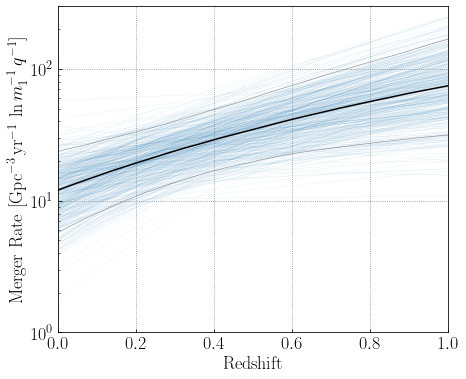

In [14]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
bq = hdata['posterior/bq'][()]
kappa = hdata['posterior/kappa'][()]
f_chis = hdata['posterior/f_chis'][()]
f_costs = hdata['posterior/f_costs'][()]

# Grid over which to evaluate R(z)
z_grid = np.linspace(0,1.5,500)
R_zs = np.zeros((R_ref.size,z_grid.size))

for i in range(R_ref.size):
    
    # Integrate over spin magnitudes and tilts
    f_chi_integral = np.trapz(f_chis[:,i],chis,axis=0)
    f_cost_integral = np.trapz(f_costs[:,i],costs,axis=0)
    
    # Probability density at q=1, given m1=20
    p_q_1 = (1.+bq[i])/(1. - (tmp_min/20.)**(1.+bq[i]))
    
    # Construct merger rate at z=0.2, m1=20, q=1
    # The first two are already baked into the definition of R_ref,
    # although we need to multiply by m1 to convert from dR/dm1 to dR/dlnm1
    R_z_02 = R_ref[i]*f_chi_integral**2*f_cost_integral**2*p_q_1*20.
    
    # Now extend across all redshifts according to our power law model
    R_zs[i,:] = R_z_02*((1.+z_grid)/(1.+0.2))**kappa[i]

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(R_zs.shape[0]),500):
    ax.plot(z_grid,R_zs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(z_grid,np.median(R_zs,axis=0),color='black')
ax.plot(z_grid,np.quantile(R_zs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(z_grid,np.quantile(R_zs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1.)
ax.set_ylim(1,300)
ax.set_yscale('log')
ax.set_xlabel('Redshift',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

Instead integrate $\frac{d\mathcal{R}}{d\ln m_1 dq}$ over log-mass and mass ratio, plotting the total inferred merger rate vs. $z$:

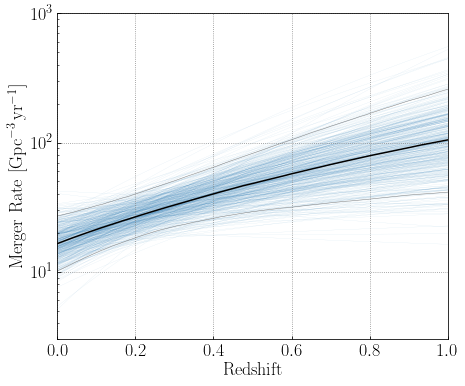

In [15]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]
kappa = hdata['posterior/kappa'][()]
f_chis = hdata['posterior/f_chis'][()]
f_costs = hdata['posterior/f_costs'][()]

# Grid over which to evaluate R(z)
mass_grid = np.linspace(5,100,1000)
z_grid = np.linspace(0,1.5,500)
R_zs = np.zeros((R_ref.size,z_grid.size))

for i in range(R_ref.size):
    
    # Integrate over spin magnitudes and tilts
    f_chi_integral = np.trapz(f_chis[:,i],chis,axis=0)
    f_cost_integral = np.trapz(f_costs[:,i],costs,axis=0)
    
    # Compute dependence of merger rate on primary mass
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1_integral = np.trapz(f_m1/f_m1_norm,mass_grid)
    
    # Construct full integrated merger rate
    R_z_02 = R_ref[i]*f_chi_integral**2*f_cost_integral**2*f_m1_integral
    
    # Now extend across all redshifts according to our power law model
    R_zs[i,:] = R_z_02*((1.+z_grid)/(1.+0.2))**kappa[i]

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(R_zs.shape[0]),500):
    ax.plot(z_grid,R_zs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(z_grid,np.median(R_zs,axis=0),color='black')
ax.plot(z_grid,np.quantile(R_zs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(z_grid,np.quantile(R_zs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1.)
ax.set_ylim(3,1000)
ax.set_yscale('log')
ax.set_xlabel('Redshift',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$]',fontsize=18)

plt.show()